# Laboratorio 07 Interpolación

#### Métodos computacionales para físicos  y astrónomos
#### Universidad de Antioquia
#### Prof: Hernan D. Salinas Jiménez & Juan Marcos Marín Ramírez

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
import sympy as sp
import math as mt
import pandas as pd

##1. Interpolación Lagrange

Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.

 Para este numeral, emplee que:


La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

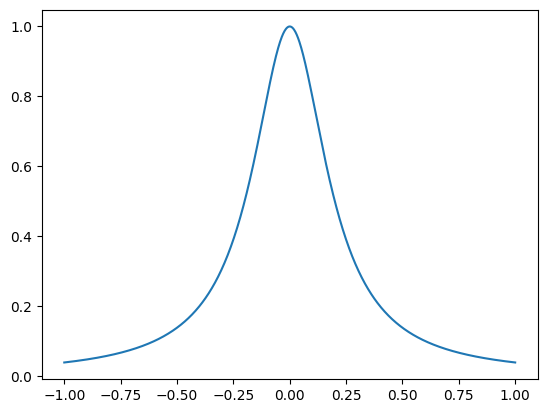

In [ ]:
f = lambda x: 1/(1+(25*(x**2)))
x = np.linspace(-1,1,1000)
plt.plot(x,f(x))
plt.show()

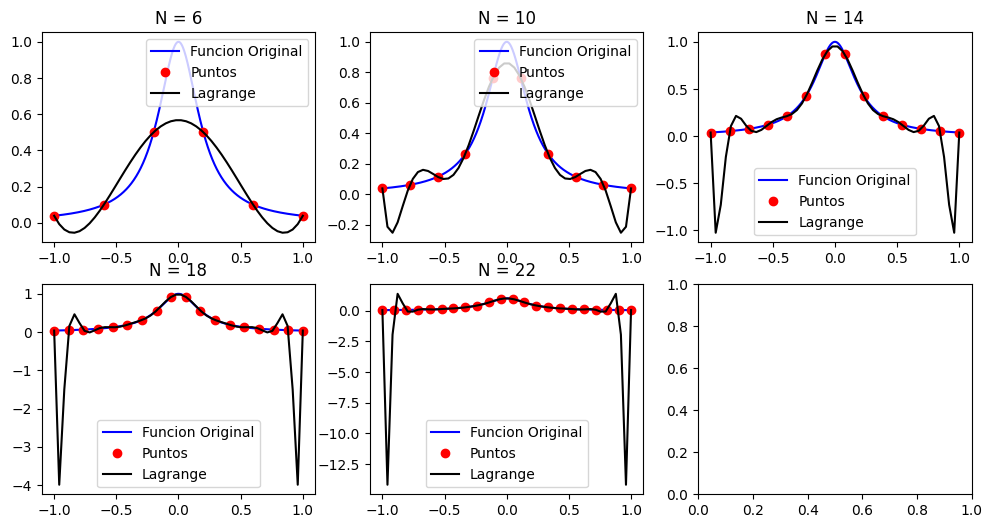

In [ ]:
N = np.array([4,8,12,16,20])
fig, axs = plt.subplots(nrows = 2, ncols=3, figsize=(12, 6 ))
for i, n in enumerate(N+1):
  ax = axs.flatten()
  n = n + 1
  x_ = np.linspace(-1,1,n) # Puntos a interpolar
  PL = lagrange(x_,f(x_))
  XL = np.linspace(np.min(x_), np.max(x_))
  ax[i].plot(x, f(x), "b-", label="Funcion Original")
  ax[i].plot(x_, f(x_), "ro", label="Puntos")
  ax[i].plot(XL, PL(XL), "k-", label="Lagrange")
  ax[i].legend()
  ax[i].set_title(f"N = {n}")

Aqui utilize CubicSpline para ver diferencias entre metodos de interpolacion

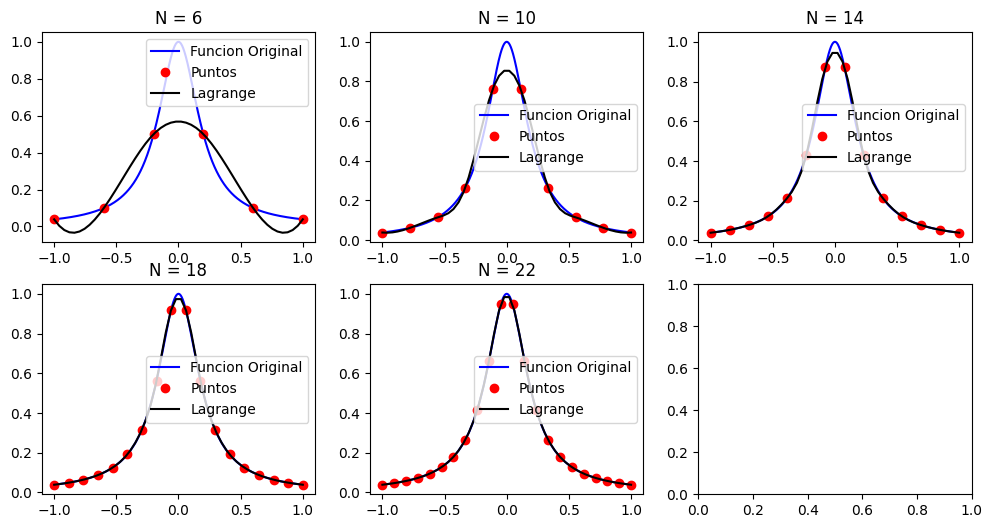

In [ ]:
N = np.array([4,8,12,16,20])
fig, axs = plt.subplots(nrows = 2, ncols=3, figsize=(12, 6 ))
for i, n in enumerate(N+1):
  ax = axs.flatten()
  n = n + 1
  x_ = np.linspace(-1,1,n) # Puntos a interpolar
  PL = CubicSpline(x_,f(x_))
  XL = np.linspace(np.min(x_), np.max(x_))
  ax[i].plot(x, f(x), "b-", label="Funcion Original")
  ax[i].plot(x_, f(x_), "ro", label="Puntos")
  ax[i].plot(XL, PL(XL), "k-", label="Lagrange")
  ax[i].legend()
  ax[i].set_title(f"N = {n}")

In [ ]:
sp.init_printing()
f_s = lambda y: 1/ (1+(25*y**2))
y = sp.symbols("y")
f_s(y)

    1    
─────────
    2    
25⋅y  + 1

In [ ]:
df5 = sp.diff(f_s(y),y,5)
f5 = sp.lambdify(y,df5,"numpy")

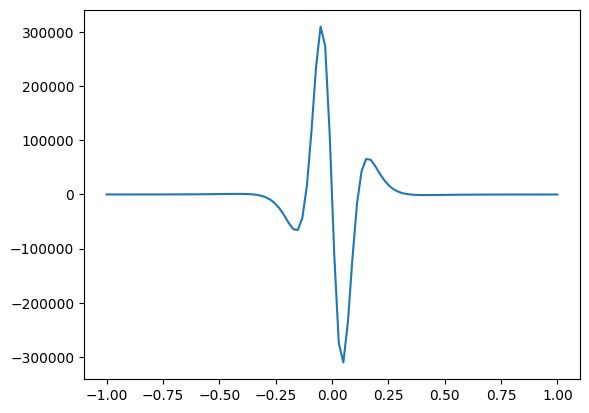

In [ ]:
x5 = np.linspace(-1,1,100)
plt.plot(x5,f5(x5))
plt.show()

In [ ]:
x_max = np.max(abs(f5(x5) )) # Es el valor mas alto en y en realidad
x_zeta = np.argmax(abs(f5(x5))) # Indice del valor x , el cual al evaluarlo f(x) es igual a x_max
x5[x_zeta] # El valor de x

-0.050505050505050386

In [ ]:
N = 4
n = N + 1
x_ = np.linspace(-1,1,n) # Puntos a interpolar
PL = lagrange(x_,f(x_))
XL = np.linspace(np.min(x_), np.max(x_))

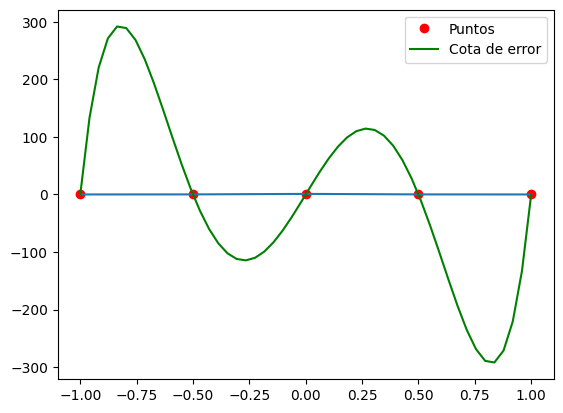

In [ ]:
plt.plot(x_,f(x_), "ro",label = "Puntos")
plt.plot(x_,f(x_))
plt.plot(XL, x_max/(mt.factorial(n))*(XL-x_[0])*(XL-x_[1])*(XL-x_[2])*(XL-x_[3])*(XL-x_[4]),"g-", label = "Cota de error")
plt.legend()
plt.show()

##2. Tangente

Para la función $f(x) = \tan (x)$ definida entre $-\frac{\pi}{4}$ y $\frac{\pi}{4}$, usando $N=10$ (9 intervalos). Grafique la función original y aquella interpolada usando Lagrange.

Explore el comportamiento del algoritmo de interpolación lineal al variar el número de datos utilizados.

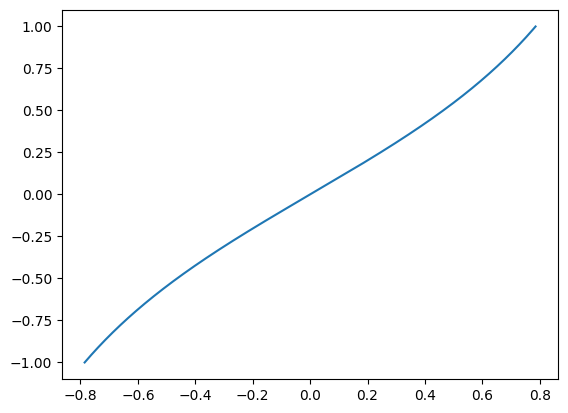

In [ ]:
f_x = lambda x: np.tan(x)
x = np.linspace(-np.pi/4,np.pi/4,1000)
plt.plot(x,f_x(x))
plt.show()

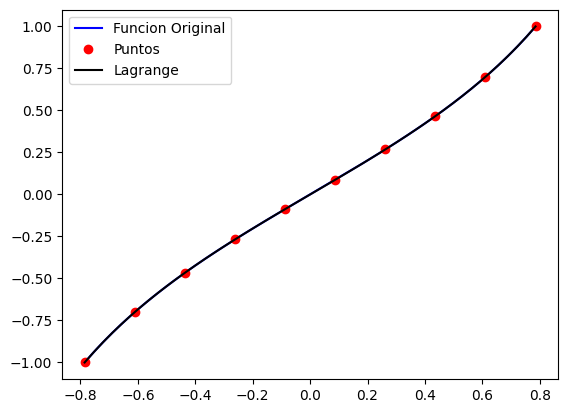

In [ ]:
N = 9
n = N + 1
xn = np.linspace(-np.pi/4,np.pi/4,n) # Puntos a interpolar
PL = lagrange(xn,f_x(xn))
XL = np.linspace(np.min(xn), np.max(xn))
plt.plot(x, f_x(x), "b-", label="Funcion Original")
plt.plot(xn, f_x(xn), "ro", label="Puntos")
plt.plot(XL, PL(XL), "k-", label="Lagrange")
plt.legend()
plt.show()

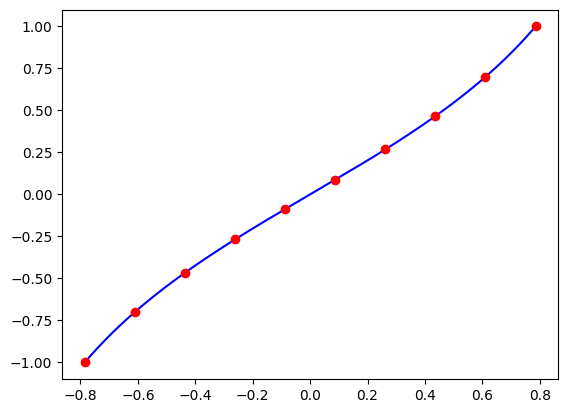

In [ ]:
plt.plot(x, f_x(x), "b-", label="Funcion Original")
plt.plot(xn, f_x(xn), "ro", label="Puntos")
plt.legend()
plt.show()

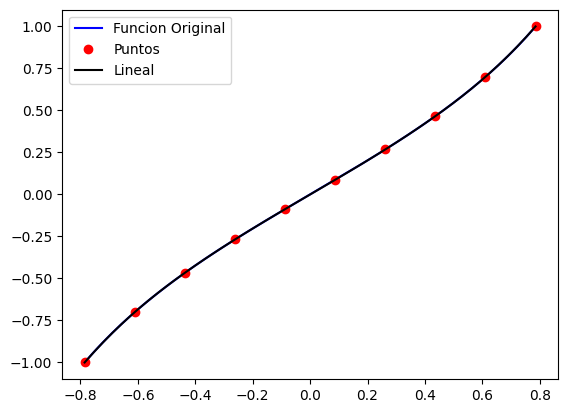

In [ ]:
N = 9
n = N + 1
xn = np.linspace(-np.pi/4,np.pi/4,n) # Puntos a interpolar
PL = CubicSpline(xn,f_x(xn))
XL = np.linspace(np.min(xn), np.max(xn))
plt.plot(x, f_x(x), "b-", label="Funcion Original")
plt.plot(xn, f_x(xn), "ro", label="Puntos")
plt.plot(XL, PL(XL), "k-", label="Lineal")
plt.legend()
plt.show()

In [ ]:
sp.init_printing()
f_t = lambda u: sp.tan(u)
u = sp.symbols("x")
f_t(u)

tan(x)

In [ ]:
df10 = sp.diff(f_t(u),u,10)
f10 = sp.lambdify(u,df10,"numpy")

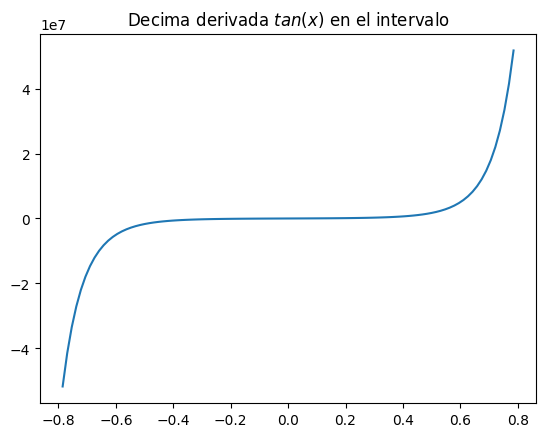

In [ ]:
x10 = np.linspace(-np.pi/4,np.pi/4,100)
plt.plot(x10,f10(x10))
plt.title("Decima derivada $tan(x)$ en el intervalo")
plt.show()

In [ ]:
y_max10 = np.max(abs(f10(x10) )) # Es el valor mas alto en y en realidad
x_zeta10 = np.argmax(abs(f10(x10))) # Indice del valor x , el cual al evaluarlo f(x) es igual a x_max
x10[x_zeta10] # El valor de x

-0.7853981633974483

In [ ]:
def i(XL,x,n):
  producto = 1
  for e in range(n):
    producto *= (XL - x_[e])
  return producto

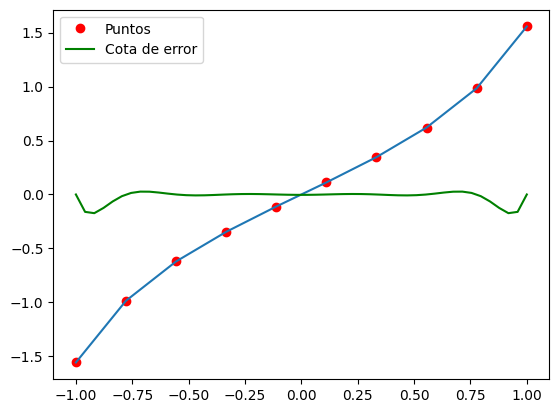

In [ ]:
N = 9
n = N + 1
x_ = np.linspace(-1,1,n) # Puntos a interpolar
XL = np.linspace(np.min(x_), np.max(x_))
plt.plot(x_,f_x(x_), "ro",label = "Puntos")
plt.plot(x_,f_x(x_))
plt.plot(XL, y_max10/(mt.factorial(n))*i(XL,x_,n),"g-", label = "Cota de error")
plt.legend()
plt.show()

##3. Datos

Usando los siguientes datos:
```
x =  np.array([1, 1.3, 1.6, 1.9, 2.2])

fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])
```
a)  Cree un dataframe y utilizando la interpolación de Lagrange encuentre



valores intermedios, esto es,

```
new_x_range = np.arange(1.1, 2.1, 0.1)
```
b) Haga un gráfico donde muestre los valores originales y aquellos interpolados.

c) Utilizando un método diferente a Lagrange repita el procedimiento y explique si hay alguna diferencia


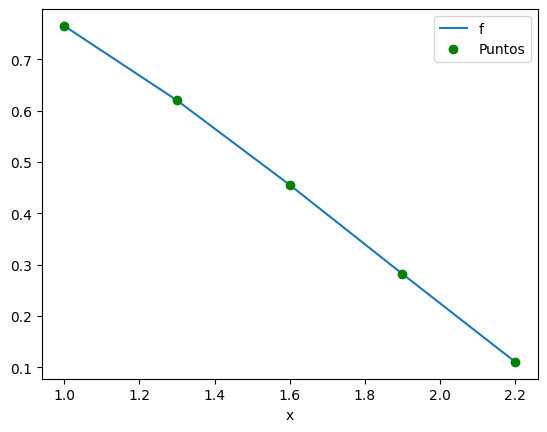

In [ ]:
x =  np.array([1, 1.3, 1.6, 1.9, 2.2])
fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])
d = {"x": x, "f": fx}
df = pd.DataFrame(d)
df.plot.line(x = "x", y = "f")
plt.plot(x,fx,"go", label = "Puntos")
plt.legend()
plt.show()

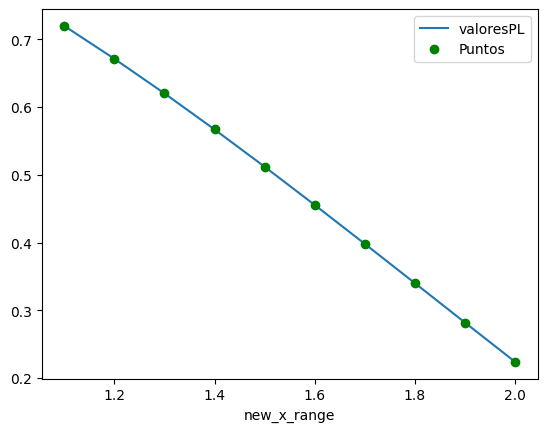

In [ ]:
new_x_range = np.arange(1.1, 2.1, 0.1)
PL = lagrange(x,fx)
valoresPL = PL(new_x_range)
d2 = {"new_x_range": new_x_range, "valoresPL": valoresPL}
df2 = pd.DataFrame(d2)
df2.plot.line(x = "new_x_range", y = "valoresPL")
plt.plot(new_x_range,valoresPL,"go", label = "Puntos")
plt.legend()
plt.show()

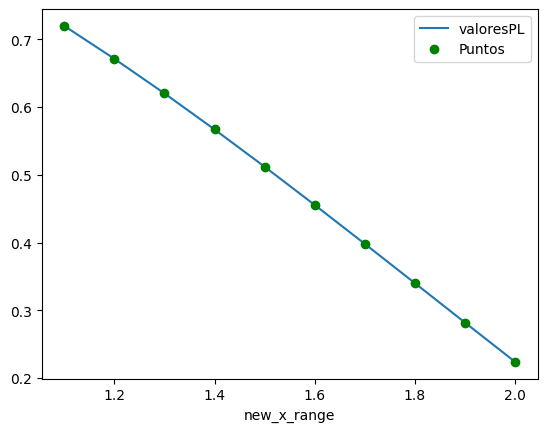

In [ ]:
new_x_range2 = np.arange(1.1, 2.1, 0.1)
PL2 = CubicSpline(x,fx)
valoresPL2 = PL(new_x_range2)
d3 = {"new_x_range": new_x_range2, "valoresPL": valoresPL2}
df3 = pd.DataFrame(d3)
df3.plot.line(x = "new_x_range", y = "valoresPL")
plt.plot(new_x_range2,valoresPL2,"go", label = "Puntos")
plt.legend()
plt.show()

En general la interpolacion utilizando lagrange o cubicspline da resultados practicamente iguales, esto se debe a que el conjuntos es una grafica "Suave" es decir, no tine picos o valles abruptos, ya que es practicamente una recta. Por lo tanto ya sea lagrange o cubicspline no va presentar problemas como se visualizo en el primer punto con lagrange.

##4. Interpolación en imágenes


# 4. Spline Cúbico

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).




Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Ref: Metodos numericos, Burden.

In [ ]:
import urllib.request

In [ ]:
pato='https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')#Decargar la imagen
imagen_pato=plt.imread('pato.jpg') #Variable con la imagen del pato

In [ ]:
x = np.array([0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3])
fx_ = np.array([1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25])

In [ ]:
PL = CubicSpline(x,fx_)
XL = np.linspace(np.min(x), np.max(x))

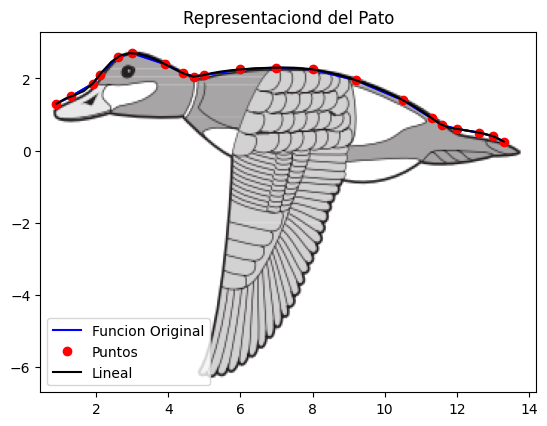

In [ ]:
plt.figure()
plt.title("Representaciond del Pato")
plt.imshow(imagen_pato, extent = (0.45, 14.2, -6.7, 3.30))
plt.plot(x,fx_,"b")
plt.plot(x, fx_, "b-", label="Funcion Original")
plt.plot(x, fx_, "ro", label="Puntos")
plt.plot(XL, PL(XL), "k-", label="Lineal")
plt.legend()
plt.show()

In [ ]:
PL = lagrange(x,fx_)
XL = np.linspace(np.min(x), np.max(x))

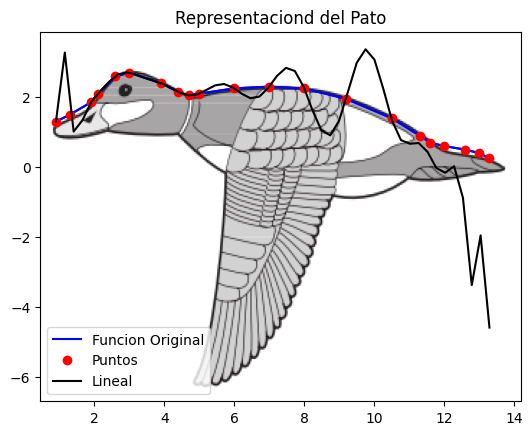

In [ ]:
plt.figure()
plt.title("Representaciond del Pato")
plt.imshow(imagen_pato, extent = (0.45, 14.2, -6.7, 3.30))
plt.plot(x,fx_,"b")
plt.plot(x, fx_, "b-", label="Funcion Original")
plt.plot(x, fx_, "ro", label="Puntos")
plt.plot(XL, PL(XL), "k-", label="Lineal")
plt.legend()
plt.show()

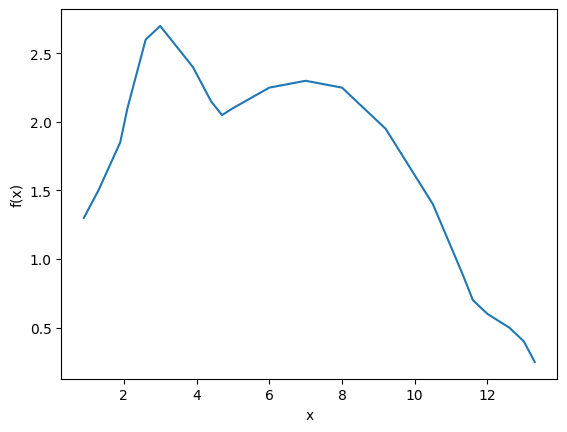

In [ ]:
plt.plot(x, fx_)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

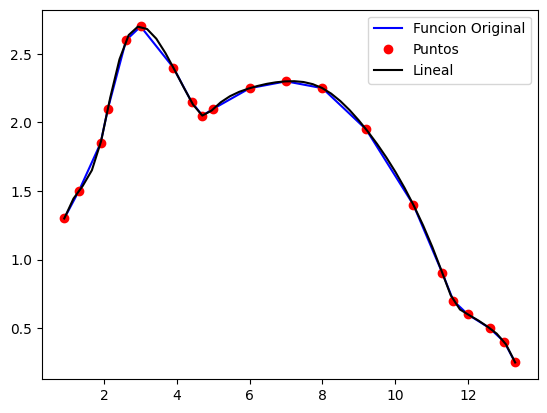

In [ ]:
PL = CubicSpline(x,fx_)
XL = np.linspace(np.min(x), np.max(x))
plt.plot(x, fx_, "b-", label="Funcion Original")
plt.plot(x, fx_, "ro", label="Puntos")
plt.plot(XL, PL(XL), "k-", label="Lineal")
plt.legend()
plt.show()

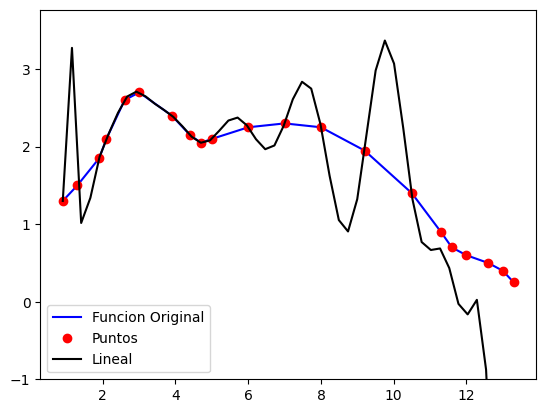

In [ ]:
PL = lagrange(x,fx_)
XL = np.linspace(np.min(x), np.max(x))
plt.plot(x, fx_, "b-", label="Funcion Original")
plt.plot(x, fx_, "ro", label="Puntos")
plt.plot(XL, PL(XL), "k-", label="Lineal")
plt.ylim(-1)
plt.legend()
plt.show()

Al comparar las dos graficas se puede concluir que el metodo de iterpolacion de lagrange falla en los entremos y donde la distancia entre es mayor, es decir, hay pocos datos en un intervalo. CubicSpline tiene la ventaja que interpola con polinomios de grado bajo(se vio en clase), por lo que tiende a producir interpolaciones más suaves y por ende es más dificil que falle(oscilaciones)